# Homework 2: Kaylen Dwyer

## Option 1

Using one of the tools that we have discussed (matplotlib and/or pandas), construct a visualization of the Illinois Building Inventory that communicates the following information -- choose 3 out of the 4 listed below to visualize:

* Relationship between the year acquired and the year constructed
* Total square footage as a function of congressional district ("Congress Dist")
* Average square footage per floor as a function of congressional district
* ~~Square footage for the five most common departments (aka "Agency Name") as a function of year.  Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.~~

In [27]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('building_inventory.csv',
                na_values = {'Year Acquired': 0,
                            'Year Constructed': 0,
                            'Square Footage':0})

When loading in the csv and converting to a dataframe, passing na_values recognizes values in the array equal to 0 as missing and drops these.

In [4]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8597.000000,8573.000000,8.805000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1972.243573,1970.391928,1.155032e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,27.549380,29.326256,3.828480e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,1753.000000,1753.000000,9.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1959.000000,1957.000000,2.400000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1975.000000,1.664000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.528000e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


## 1. Relationship between year acquired and year constructed

A simple relationship between two items can be plotted in matplotlib by assigning each to the 'x' and 'y' values. The scatterplot shows that buildings tend to be acquired close to or at the same time of construction. A better visualization might be able to show more clearly what points deviate from this pattern--by a margin of perhaps larger than 5 years. 

In [131]:
# # relationships between year acquired and year constructed
# stats1 = df.groupby('Year Acquired')['Year Constructed'].describe().head()

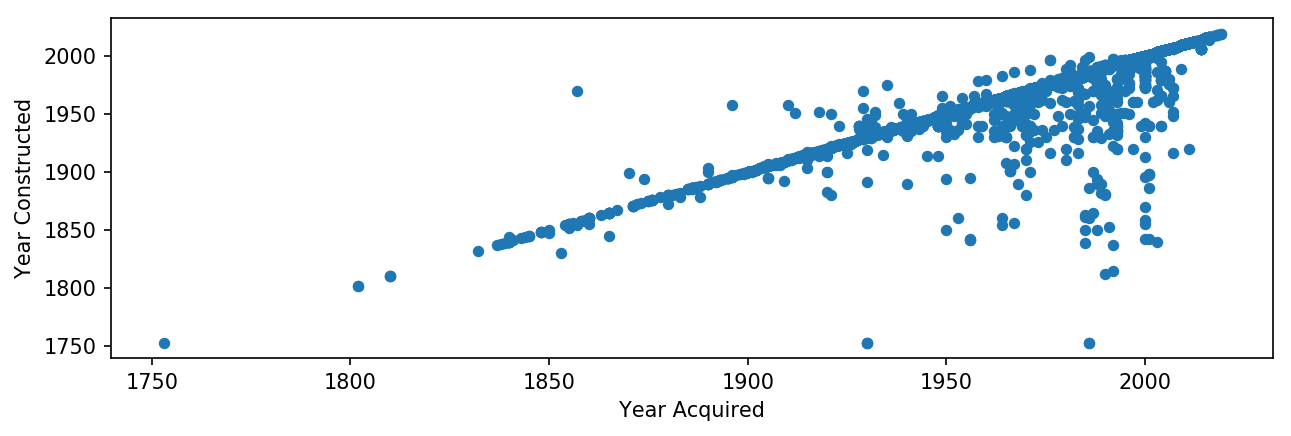

In [135]:
stats1 = df.plot(x='Year Acquired', y='Year Constructed',  
                figsize=(10,3), kind='scatter')

## 2. Total square footage as a function of congressional district ("Congress Dist")

Data on square footage is grouped by congressional district and summed to find the total per district, using .groupby() to split the data and apply the .sum() function. 

This result is stored in the new dataframe stats2. Storing the result in a new dataframe makes it easier to manipulate and create a visualization. A bar graph from matplotlib is used with the y-scale set to 'log' for readability. The method is straightforward. 

There may be ways to make this bar graph more usable/readable, since at the moment it is a little opaque. Tick marks across or labels above the bars may be helpful. 

In [141]:
stats2 = df.groupby('Congress Dist')['Square Footage'].sum() # split, apply .sum()

Text(0.5, 0, 'Congress Dist')

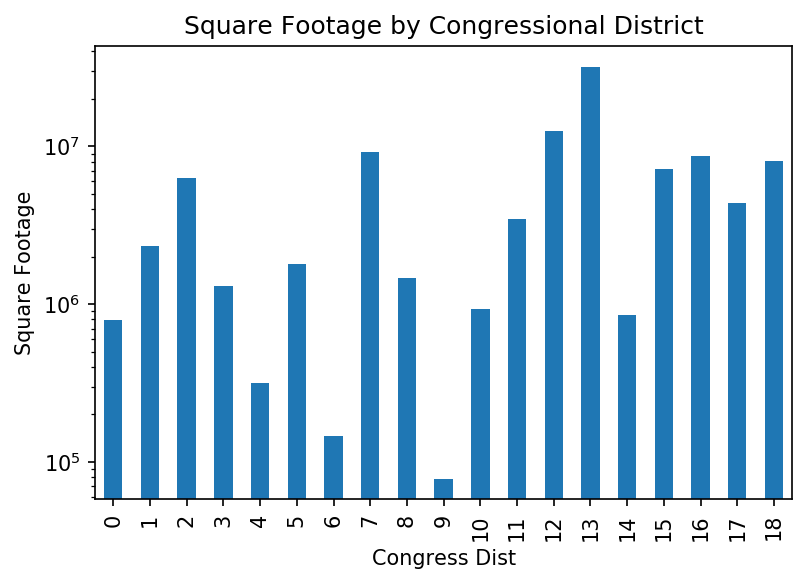

In [139]:
p = stats2.plot.bar() # call matplotlib
p.set_yscale('log')
plt.title('Square Footage by Congressional District')
plt.ylabel('Square Footage')
plt.xlabel('Congress Dist')

## 3. Average square footage per floor as a function of congressional district

My solution to this problem is clumsy. To get the average square footage per floor, I created a new column in the dataframe, in order to later group this by congressional distrit. While I understand that .groupby() is designed for Split-Apply-Combine, I felt uncertain about how to chain these.

Breaking the process up is not an issue with a smaller dataset, but at a larger scale, this could be memory-intensive. Adding an additional column is undesirable, as it would be best to preserve the original dataset.

When I originally found the average square foot per floor, I noticed that some congressional districts showed that they had *no* average. After some investigating/selecting data with .loc, I found some missing fields in 'Total Floors' then removed these.

In [106]:
df['Avg Sqft'] = df['Square Footage'] / df['Total Floors'] # make a new column for the dataframe :(
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3,Avg Sqft
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,2000.0,2000.0,120.0,1,1,0,Unusual,Unusual,Not provided,120.0
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,2000.0,2000.0,120.0,1,1,0,Unusual,Unusual,Not provided,120.0
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,2000.0,2000.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,2000.0,2000.0,144.0,1,1,0,Unusual,Unusual,Not provided,144.0


In [140]:
# df['Total Floors']
# you can't have 0 floors. weird things are happening.

# In with the data again, though I could clean it other ways
df2 = pd.read_csv('building_inventory.csv',
                na_values = {'Year Acquired': 0,
                            'Year Constructed': 0,
                            'Square Footage':0,
                            'Total Floors': 0})

df2['Avg Sqft'] = df2['Square Footage'] / df2['Total Floors']
df2

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3,Avg Sqft
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,1975.0,1975.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,2000.0,2000.0,120.0,1.0,1,0,Unusual,Unusual,Not provided,120.0
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,2000.0,2000.0,120.0,1.0,1,0,Unusual,Unusual,Not provided,120.0
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,144.0


In [126]:
stats3 = df2.groupby('Congress Dist')['Avg Sqft'].mean()

Text(0.5, 0, 'Congress District')

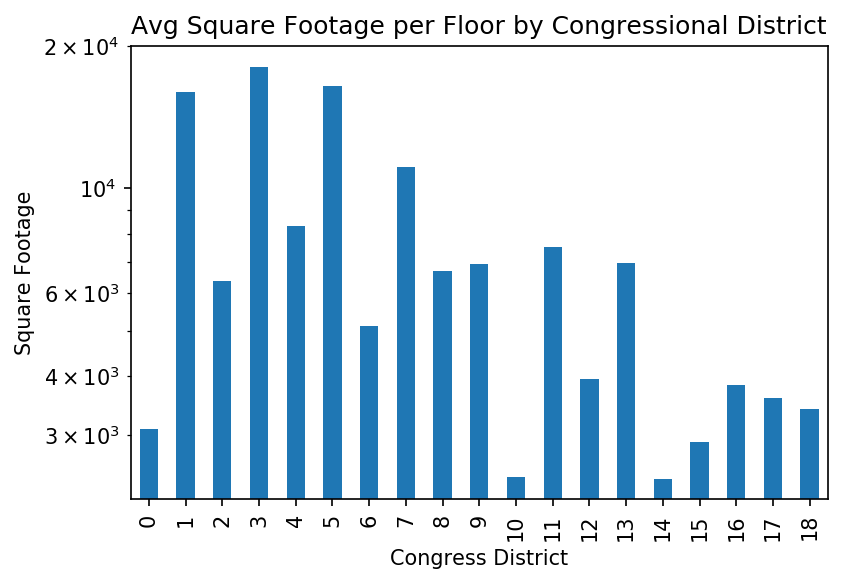

In [128]:
p = stats3.plot.bar()
p.set_yscale('log')
plt.title('Avg Square Footage per Floor by Congressional District')
plt.ylabel('Square Footage')
plt.xlabel('Congress District')